## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./401ksubs.csv')

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In order to predict income: 
- Age
- Education 
- Location

In order to predict 401k eligibility:
- Age
- Years on the Job
- Industry

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

If there is any correlation to a person's previous likelihood of wanting an IRA or 401k and race that is not explained by other factors, it is likely that that correlation exists due to access, exposure or discrimination used in the past. To choose to advertise a 401k or IRA to a person based on their race rather than other factors could perpetuate unfair practices of the past. 

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

**Intuitive Answer:** Looking at the data dictionary, family size jumps out at me as likely to be the least likely to predict income level. While it is true that a person with a bigger family will need a higher income to support his or her family, I don't expect it to be as strong an indicator as other factors. 

I am unsure whether or not marriage is a good indicator. I wonder if combining it with gender and family size may help to predict as families with children often have one parent stay at home and that parent is more often the mother, so it seems likely that a married female with children is less likely to have a personal income than an unmarried female with children or a female without children. 

**Analytical Answer:** Checking heatmap below. Gender, age and family size do not predict income.

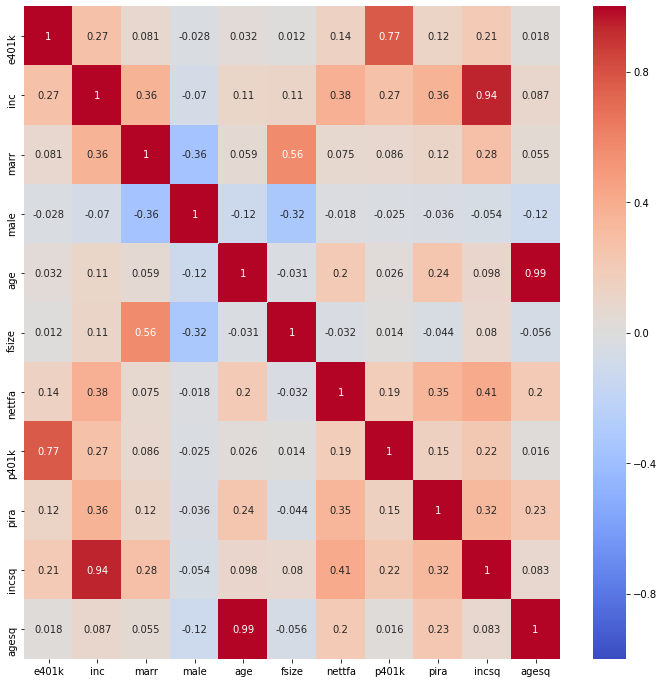

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, annot=True);

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

- Income Squared - this is likely because the relationship between income and 401k probability is a square one
- Age Squared - either the same reason as above or because the relationship between age and income level is a squared one.

- The heatmap above does not indicate that any of these theories are true, so my expectation is that the log odds of a 401k or IRA or the log of income relate to these factors. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

Income is described as income squared, but it should just be income. 

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

- Create a histogram of each variable to determine if it makes sense to take the log of any data
- Create a heatmap of the correlation between data to determine:
    - What factors are predictive of income?
    - What factors are correlated to one another to avoid including multiple factors correlated to one another in the model? 
- Create a pairplot to look at relationships between data
- Create a lasso regression to look for factors with larger magnitude beta coefficients.

<Figure size 864x864 with 0 Axes>

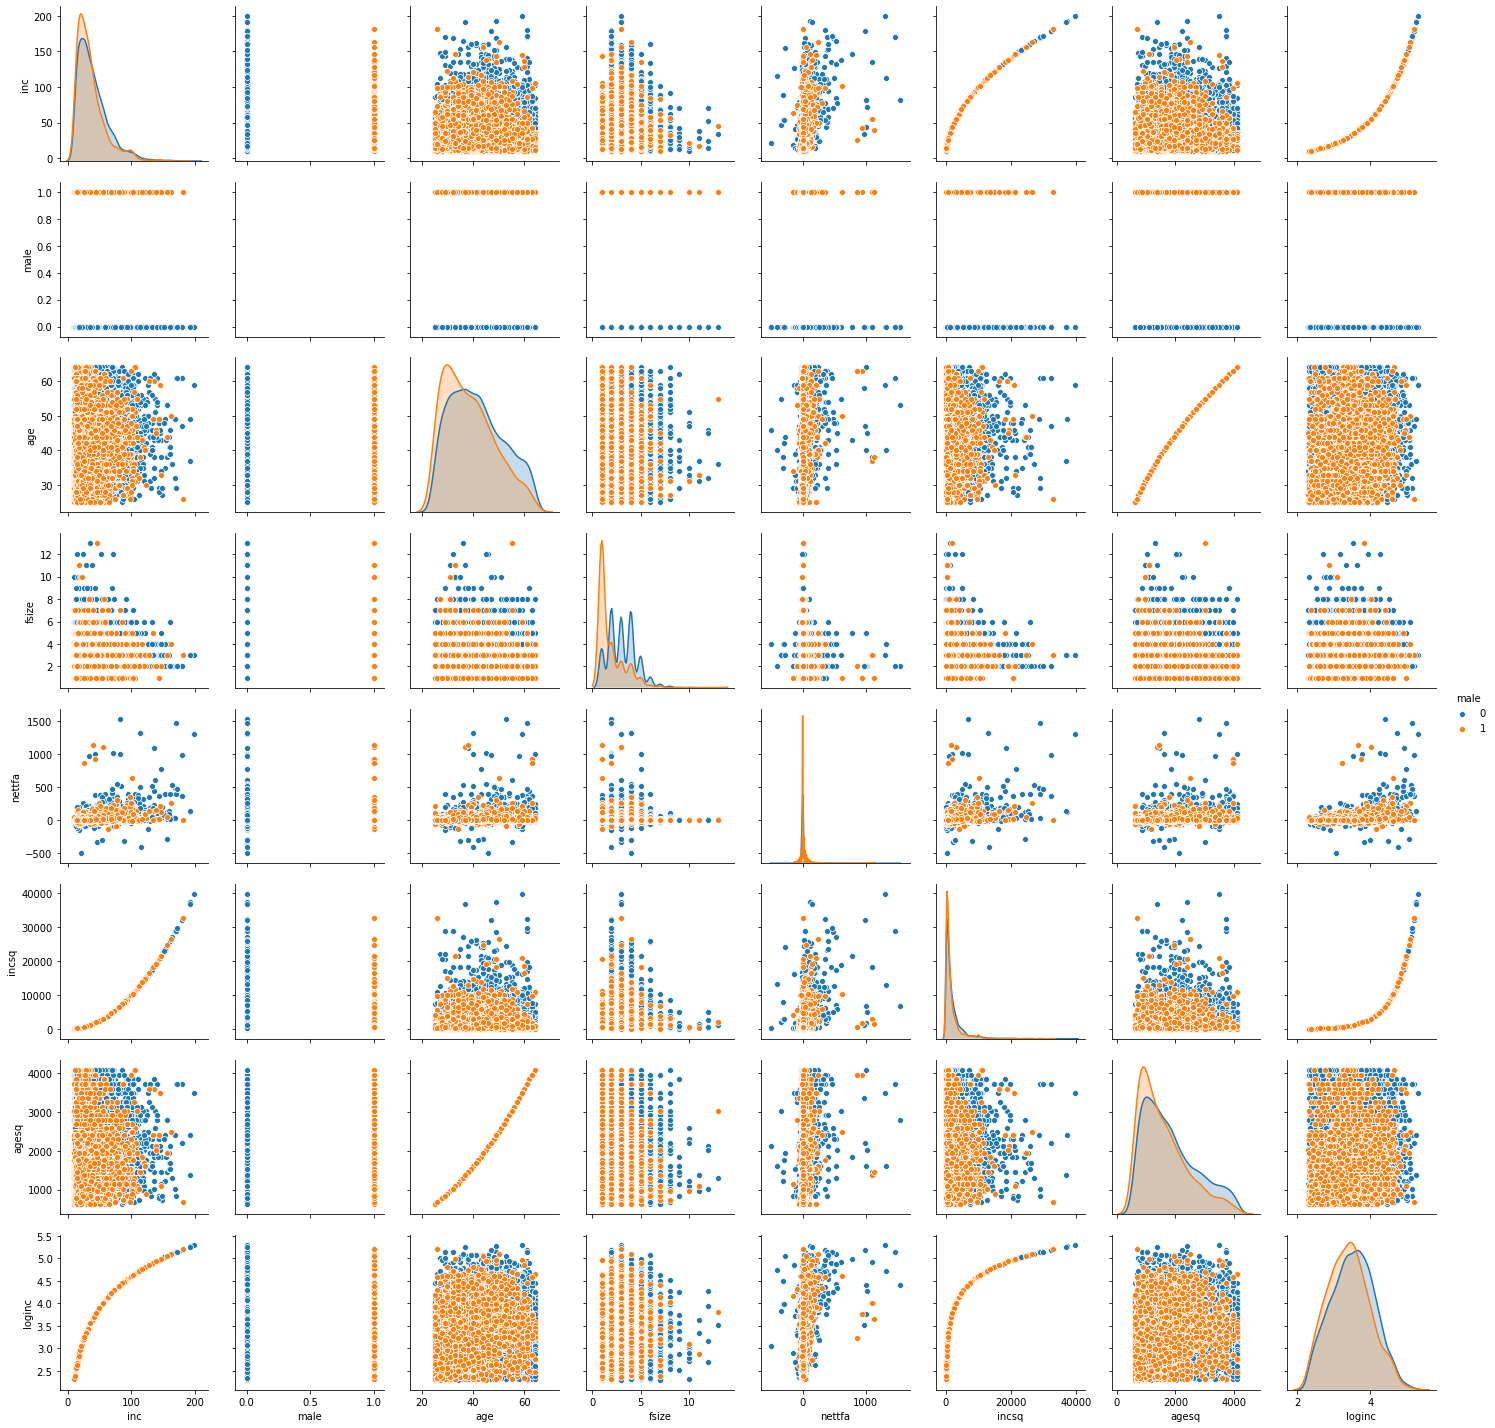

In [22]:
plt.figure(figsize=(12, 12))
df['loginc']=np.log(df.inc)
sns.pairplot(df.drop(['e401k', 'p401k', 'pira', 'marr'], axis=1), hue='male');

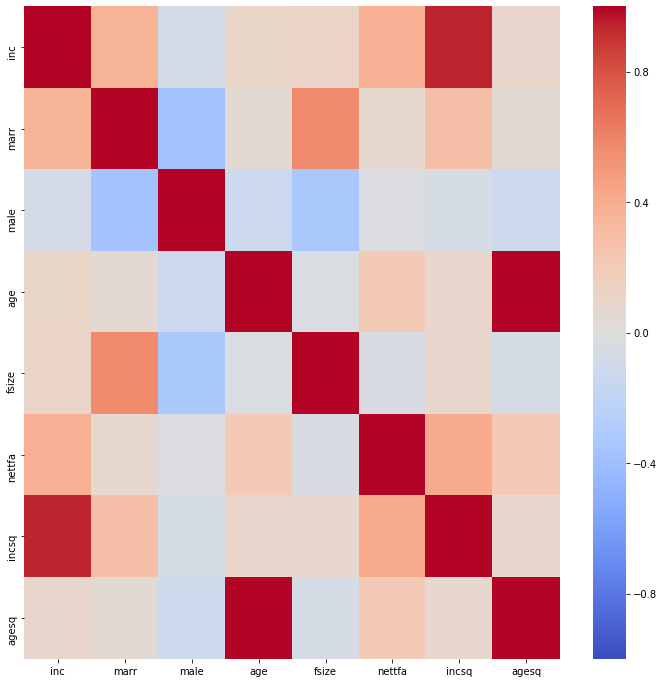

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.drop(['e401k', 'p401k', 'pira'], axis=1).corr(), cmap='coolwarm', vmin=-1);

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [98]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor, \
GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, \
AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler

### Multiple linear regression model

In [25]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq', 'loginc'],
      dtype='object')

In [219]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [229]:
lr = LinearRegression(normalize=True)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# gs_param = {
#     'fit_intercept':[True], 
#     'normalize':[True], 
#     'copy_X':[True]
# }
# gs = GridSearchCV(lr, gs_param, cv=3)
model = lr.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, lr.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

Train RSME: 0.23684918433656088
Test RSME: 0.2374523107884257
Cross val score: 0.287151357153008


{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [230]:
coef = pd.DataFrame(model.coef_.T, index=X.columns)
coef.sort_values(0)

,0
agesq,-0.768741
fsize,-0.092285
male,0.032558
nettfa,0.159728
marr,0.282943
age,0.774887


In [223]:
lr = Ridge()
gs_param = {
    'alpha':[1.1, 1.2], 
    'normalize':[False], 
    'copy_X':[True],
    'tol' : [0.001]
}
gs = GridSearchCV(lr, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

Train RSME: 0.23685331826693198
Test RSME: 0.23755938754870295
Cross val score: 0.2871527818785512


{'alpha': 1.1, 'copy_X': True, 'normalize': False, 'tol': 0.001}

In [103]:
lr = Lasso()
gs_param = {
    'alpha':[.0001, .001], 
    'fit_intercept':[True],
    'normalize':[False], 
    'copy_X':[True],
    'tol' : [0.00001]
}
gs = GridSearchCV(lr, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

Train RSME: 0.23685226524664343
Test RSME: 0.237542941890718
Cross val score: 0.2871451024694851


{'alpha': 0.0001,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': False,
 'tol': 1e-05}

### K Nearest Neighbors Regression

In [108]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

knn = KNeighborsRegressor()

gs_param = {
    'n_neighbors':[16, 17, 18], 
    'weights':['uniform'],
    'leaf_size':[4, 5, 6], 
    'p':[2, 3, 4],
    'metric' : ['minkowski'],
    'n_jobs' : [2]
}
gs = GridSearchCV(knn, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train RSME: 0.192405508225068
Test RSME: 0.20366693139712144
Cross val score: 0.34245565987237825


{'leaf_size': 5,
 'metric': 'minkowski',
 'n_jobs': 2,
 'n_neighbors': 17,
 'p': 3,
 'weights': 'uniform'}

### Decision Tree

In [111]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

dt = DecisionTreeRegressor()

gs_param = {
    'criterion':['mse'], 
    'splitter':['best'],
    'max_depth':[5], 
    'min_samples_split':[2, 3, 4],
    'min_weight_fraction_leaf' : [0.01, 0.05],
    'max_features': ['auto'],
    'max_leaf_nodes' : [25],
#    'n_jobs' : [2]
}
gs = GridSearchCV(dt, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

Train RSME: 0.19342665215610844
Test RSME: 0.19528335081149545
Cross val score: 0.395701174316103


/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 25,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'splitter': 'best'}

### Bagged Decision Trees

In [124]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

br = BaggingRegressor()

gs_param = {
    'n_estimators':[9, 10, 11], 
#    'max_samples':[(0, 20), (0, 100)],
#    'max_features':[(0, 3), (0, 4)], 
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'n_jobs' : [2]
}
gs = GridSearchCV(br, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train RSME: 0.0780764763732934
Test RSME: 0.22356139376549888
Cross val score: 0.3136654692515551


{'bootstrap': True,
 'bootstrap_features': True,
 'n_estimators': 10,
 'n_jobs': 2}

### Random Forrest

In [135]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

rf = RandomForestRegressor()

gs_param = {
    'criterion':['mse'], 
    'n_estimators' : [130],
    'max_depth':[7], 
    'min_samples_split':[2],
    'min_weight_fraction_leaf' : [0.01],
    'max_features': ['auto'],
    'max_leaf_nodes' : [27],
    'bootstrap':[True]
}
gs = GridSearchCV(rf, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, gs.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, gs.predict(X_test))}')
print(f'Cross val score: {gs.best_score_}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train RSME: 0.1881781460955098
Test RSME: 0.19008864795544778
Cross val score: 0.4129644850062664


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 27,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 130}

### Adaboost

In [142]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

dtr = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=2,
    max_features='auto',
    max_leaf_nodes=25,
)

abr = AdaBoostRegressor(base_estimator = dtr)

# gs_param = {
#     'base_estimators' : [40, 50, 60],
#     'learning_rate':[0.9, 1.0, 1.1], 
#     'loss':['linear', 'square', 'exponential'],
# }

# gs = GridSearchCV(abr, gs_param, cv=3)
abr.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, abr.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, abr.predict(X_test))}')
# print(f'Cross val score: {gs.best_score_}')
# gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train RSME: 0.2043455626580245
Test RSME: 0.212089904804441


### Support Vector Regressor

In [146]:
features = ['marr', 'male', 'age', 'fsize', 'nettfa', 'agesq']
X = df[features]
y = df['loginc']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

svr = SVR()

# gs_param = {
#     'kernel':['rbf', 'sigmoid', 'precomputed'], 
#     'gamma':['auto'], 
#     'C':[0.1, 1, 10]
# }
# gs = GridSearchCV(svr, gs_param, cv=3)
svr.fit(X_train, y_train)

print(f'Train RSME: {mean_squared_error(y_train, svr.predict(X_train))}')
print(f'Test RSME: {mean_squared_error(y_test, svr.predict(X_test))}')
# print(f'Cross val score: {gs.best_score_}')
# gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Train RSME: 0.20543183448605626
Test RSME: 0.20655935862965658


##### 9. What is bootstrapping?

Bootstrapping is a method of sampling data for a model in which data is randomly rampled with replacement to build multiple models to average together to improve the overall result of the model

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

A decision tree is a single model based off of a set of data whereas a set of bagged decision trees are several models based off of bootsttrapped data.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

With bagged decision trees, all features are considered in the model. With random forrest, features are randomly removed from the model. The effect of this is that random forrest builds models that are more different from one another than bagged decision trees. Some of these models may be significantly worse, but with the average of very different models, it is possible to create a better overall model. 

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Aside from reason listed above (that the models are more diverse, so the average of the models can be better), a random forrest is also less likely to have less variance because if any predictor can be overift to the training data, it will not pay a role in every model in the set of models used.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

See above print statements of RSME.
Of the models I ran, random forrest had the lowest RSME on the test data. 

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

My Bagged Decision Tree model appears to be overfit. 

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Random Forrest. Not only did it get the best scores, but the Decision Tree score indicates that this is a good direction. Using a pipeline, I believe this model could be further optimized

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- Optimize each model to income, log income, square income
- Include feature engineering
- Use a pipeline to optimize the decision tree parameters for a random forrest model

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

- Participating in a 401k is a guarantee that an individual is eligible for a 401k, so the model will strongly correlate participation with a 401k with eligibility for a 401k.
- Not participating in a 401k could mean a person is either eligible or ineligible for a 401k. 
- A model which incorporates participation is likely to missclassify individuals who are eligible for a 401k but choose not to participate in one. 

- The best model may be one that is built without incorporating p401k but has a rule that if a person participates in a 401k program, they are automatically classified as eligible. 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

- Look at correlation scores
- Look at accuracy as compared with baseline, sensitivity, specificity, and f-score
- Look at ROC AUC curve as well as consequences of fps and fns to optimize threshold of model
- Evaluate missclassified data points to determine methods to improve model


##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

### Logistic Regression

In [96]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq', 'loginc'],
      dtype='object')

In [157]:
# Baseline Accuracy
df.groupby('e401k').count().inc[0]/df.groupby('e401k').count().inc.sum()

0.6078706199460916

In [169]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(penalty='l1', tol=0.0001, fit_intercept=True, max_iter=20, solver='liblinear')

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


lr.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, lr.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, lr.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, lr.predict(X_test))}')
# print(f'Cross val score: {gs.best_score_}')
# gs.best_params_ 

Train f1 score: 0.8263011351467124
Test f1 score: 0.8269105160026127
Test accuracy score: 0.8857266062958171


/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [170]:
coef = pd.DataFrame(lr.coef_.T, index=X.columns)
coef.sort_values(0)

In [175]:
X = df.drop(['e401k', 'p401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression(penalty='l1', tol=0.0001, fit_intercept=True, max_iter=20, solver='liblinear')

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


lr.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, lr.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, lr.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, lr.predict(X_test))}')

Train f1 score: 0.4616422947131609
Test f1 score: 0.4536082474226804
Test accuracy score: 0.6571798188874515


/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### K-Nearest Neighbors

In [182]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier()

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

gs_param = {
    'n_neighbors':[9, 11, 13], 
    'weights':['uniform'],
    'algorithm' : ['auto'],
    'leaf_size': [12, 13, 14], 
    'p': [2],
    'metric' : ['manhattan'],
    'n_jobs' : [2]
}
gs = GridSearchCV(knn, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')

gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Train f1 score: 0.8279661016949152
Test f1 score: 0.823225806451613
Test accuracy score: 0.881845623113411


{'algorithm': 'auto',
 'leaf_size': 12,
 'metric': 'manhattan',
 'n_jobs': 2,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

### Decision Tree

In [189]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

dt = DecisionTreeClassifier()

gs_param = {
    'criterion':['gini'], 
    'splitter':['best', 'random'],
    'max_depth':[None], 
    'min_samples_split':[2],
    'min_weight_fraction_leaf' : [.05],
    'max_features': ['auto'],
    'max_leaf_nodes' : [10, 11, 12],
#    'n_jobs' : [2]
}
gs = GridSearchCV(dt, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
gs.best_params_ 

Train f1 score: 0.7971905179982441
Test f1 score: 0.7959731543624162
Test accuracy score: 0.8689090125053902


/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 11,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.05,
 'splitter': 'best'}

### Bagged Decision Trees

In [194]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

bc = BaggingClassifier()

gs_param = {
    'n_estimators':[9, 10, 11], 
    'max_samples':[15, 20, 25],
    'max_features':[6], 
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'n_jobs' : [2]
}
gs = GridSearchCV(bc, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Train f1 score: 0.8214058186451476
Test f1 score: 0.8214055448098002
Test accuracy score: 0.8805519620526089


{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 6,
 'max_samples': 20,
 'n_estimators': 10,
 'n_jobs': 2}

### Random Forrest

In [197]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

rf = RandomForestClassifier()

gs_param = {
    'criterion':['gini'], 
    'n_estimators' : [80, 90, 100],
    'max_depth':[6], 
    'min_samples_split':[2],
    'min_weight_fraction_leaf' : [0.01],
    'max_features': [3, 4, 5],
    'max_leaf_nodes' : [27, 28, 29],
    'bootstrap':[True]
}
gs = GridSearchCV(rf, gs_param, cv=2)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Train f1 score: 0.8263011351467124
Test f1 score: 0.8274509803921568
Test accuracy score: 0.8861578266494179


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 3,
 'max_leaf_nodes': 27,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'n_estimators': 100}

### AdaBoost

In [212]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

dtc = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    max_features='auto',
    max_leaf_nodes=11,
    min_weight_fraction_leaf=0.05
)

abc = AdaBoostClassifier(base_estimator = dtc)

gs_param = {
    'n_estimators':[1, 2, 3], 
    'learning_rate': [0.6],
    'algorithm' : ['SAMME', 'SAMME.R']
}

gs = GridSearchCV(abc, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Train f1 score: 0.8263011351467124
Test f1 score: 0.8274509803921568
Test accuracy score: 0.8861578266494179


{'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 3}

### Support Vector Classifier

In [215]:
X = df.drop(['e401k', 'inc', 'incsq'], axis=1)
y = df['e401k']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

svc = SVC()

gs_param = {
    'C':[0.1, 1, 10]
}
gs = GridSearchCV(svc, gs_param, cv=3)
gs.fit(X_train, y_train)

print(f'Train f1 score: {f1_score(y_train, gs.predict(X_train))}')
print(f'Test f1 score: {f1_score(y_test, gs.predict(X_test))}')
print(f'Test accuracy score: {accuracy_score(y_test, gs.predict(X_test))}')
gs.best_params_ 

/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/mags/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/mags/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mags/anaconda3/lib/python3.7/site-pack

Train f1 score: 0.827054794520548
Test f1 score: 0.8274509803921568
Test accuracy score: 0.8861578266494179


{'C': 1}

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

- False positives are individuals who are ineligible for a 401k but the model guessed were eligible
- False negatives are individuals who are eligible for a 401k but the model guessed were ineligible

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

We would rather minimize false negatives because (my guess) is the cost of advertising to individuals who are ineligible is less than the loss of not advertising to individuals who are eligible.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

We will want to optimize sensitivity.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

f1-score is appropriate because if a false positive or false negative is equally bad, this is a great way to evenly distribute missclassification.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

See print statemenets above

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

No. All of my models have quite similar f1 scores for training and testing data. Logistic regression is the closest to being overfit. 

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I think the SVC classifier or Adaboost classifier might be the best. I did not put as much time in feature optimization for either of thesae but they will managed to have comparable f1 scores to more tuned models. 

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

- Recreate model without p401k. Create model for that data and add a rule that any individual who participates in a 401k is eligible. 
- Add feature engineering
- Average multiple models that are created differently to finalize my prediction. 

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Age is the strongest predictor of both one's income and one's eligibility for a 401k. 